<a href="https://colab.research.google.com/github/Domsheen/learning-coding-projects/blob/main/NodeClassificationWithCiteSeerDataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.5 MB/s eta 0:00:00


In [3]:
import torch
import random
import matplotlib.pyplot as plt


In [4]:
# Import the Planetoid dataset class from PyTorch Geometric (PyG)
from torch_geometric.datasets import Planetoid

# Import NormalizeFeatures to normalize node features
from torch_geometric.transforms import NormalizeFeatures

# Load the Citeseer dataset with node feature normalization
citeseer_dataset = Planetoid(root="Citeseer_dataset", name="Citeseer", transform=NormalizeFeatures())


Processing...
Done!


In [5]:
# Get the number of graphs in the dataset
len(citeseer_dataset)

1

In [6]:
# Get the number of classes in the dataset
citeseer_dataset.num_classes

# num_classes returns the number of unique categories (labels) for node classification.


6

In [7]:
# Get the number of node features
citeseer_dataset.num_node_features

# In Citeseer, each node (paper) is represented by a feature vector of word embeddings.


3703

In [8]:
# Extract the actual graph from the dataset
citeseer_graph = citeseer_dataset[0]

# Print the graph data object
citeseer_graph

# Output:
# Data(x=[3327, 3703], edge_index=[2, 9228], y=[3327])


Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])

In [9]:
citeseer_graph.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [10]:
# Print the number of training samples (nodes used for training)
print("Training samples: ", citeseer_graph.train_mask.sum().item())

# Print the number of validation samples (nodes used for validation)
print("Validation samples: ", citeseer_graph.val_mask.sum().item())

# Print the number of test samples (nodes used for testing)
print("Test samples: ", citeseer_graph.test_mask.sum().item())


Training samples:  120
Validation samples:  500
Test samples:  1000


In [11]:
# Get the labels for each node in the graph
citeseer_graph.y

tensor([3, 1, 5,  ..., 3, 1, 5])

In [12]:
# Print the total number of nodes in the graph
print(f'Number of nodes: {citeseer_graph.num_nodes}')

# Print the total number of edges (connections) in the graph
print(f'Number of edges: {citeseer_graph.num_edges}')

# Calculate and print the average node degree (connections per node)
print(f'Average node degree: {citeseer_graph.num_edges / citeseer_graph.num_nodes:.2f}')

# Check if the graph has isolated nodes (nodes with no edges)
print(f'Has isolated nodes: {citeseer_graph.has_isolated_nodes()}')

# Check if the graph contains self-loops (nodes connecting to themselves)
print(f'Has self-loops: {citeseer_graph.has_self_loops()}')

# Check if the graph is undirected (if for every edge A → B, there's also B → A)
print(f'Is undirected: {citeseer_graph.is_undirected()}')


Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Has isolated nodes: True
Has self-loops: False
Is undirected: True


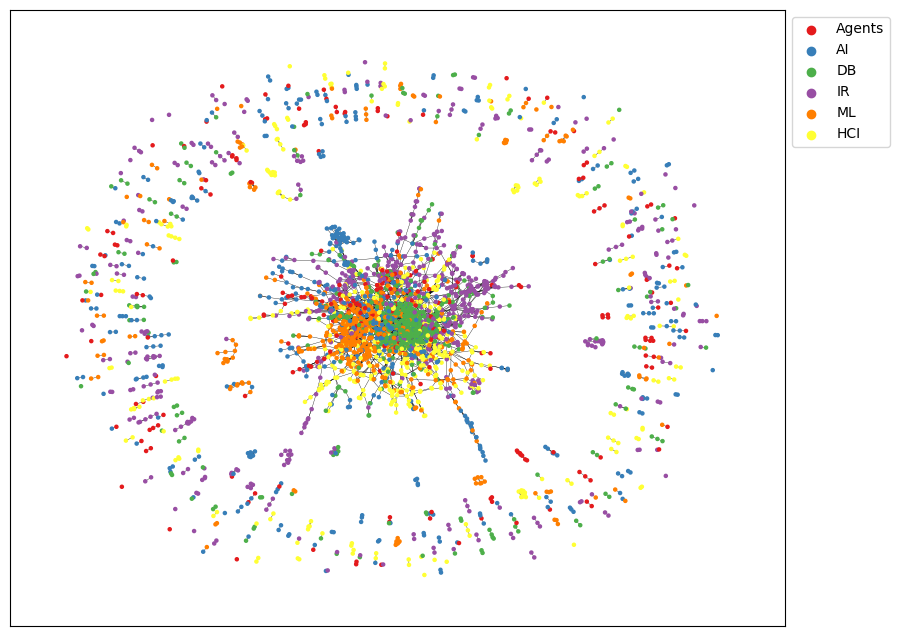

In [13]:
# Import necessary libraries
import networkx as nx  # NetworkX is used for graph visualization and manipulation
from torch_geometric.utils import to_networkx  # Converts PyTorch Geometric (PyG) graphs to NetworkX format
import matplotlib.pyplot as plt  # Used for plotting

# Define a dictionary to map numerical labels to category names
label_dict = {
    0: "Agents",  # Category 0 corresponds to "Agents"
    1: "AI",      # Category 1 corresponds to "AI"
    2: "DB",      # Category 2 corresponds to "Databases (DB)"
    3: "IR",      # Category 3 corresponds to "Information Retrieval (IR)"
    4: "ML",      # Category 4 corresponds to "Machine Learning (ML)"
    5: "HCI"      # Category 5 corresponds to "Human-Computer Interaction (HCI)"
}

# Define a list of colors, one for each class label
# These colors will be used to color-code nodes based on their category
colorlist = ['#e41a1c',  # Red for "Agents"
             '#377eb8',  # Blue for "AI"
             '#4daf4a',  # Green for "DB"
             '#984ea3',  # Purple for "IR"
             '#ff7f00',  # Orange for "ML"
             '#ffff33']  # Yellow for "HCI"

# Convert the PyTorch Geometric graph (citeseer_graph) into a NetworkX graph
# This allows us to use NetworkX's built-in visualization and manipulation tools
G = to_networkx(citeseer_graph, to_undirected=True)
# `to_undirected=True` ensures the graph is converted to an undirected format (bidirectional edges)

# Prepare node colors based on labels
# Each node gets assigned a color based on its category (from `colorlist`)
node_color = [colorlist[int(label)] for label in citeseer_graph.y]

# Prepare label names for each node based on its category
labellist = [label_dict[int(label)] for label in citeseer_graph.y]

# Compute the layout (positions) of nodes for visualization
# `spring_layout` positions nodes in a way that minimizes edge overlap and makes the graph readable
pos = nx.spring_layout(G, seed=42)  # Seed ensures consistency in layout across multiple runs

# Create a figure for the plot with a specified size
plt.figure(figsize=(10, 8))

# Draw the graph nodes, using the computed positions and assigned colors
nx.draw_networkx_nodes(G, pos, node_size=5, node_color=node_color)
# `node_size=5` keeps nodes small for a clearer visualization
# `node_color=node_color` assigns colors based on categories

# Draw the graph edges
nx.draw_networkx_edges(G, pos, width=0.25)
# `width=0.25` makes the edges thinner to prevent clutter

# Add a legend to explain which color corresponds to which category
for label, color in zip(label_dict.values(), colorlist):
    plt.scatter([], [], c=color, label=label)
# `plt.scatter([], [], c=color, label=label)` creates invisible points in the legend with the correct colors

# Position the legend outside the graph for better readability
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

# Display the final graph visualization
plt.show()

In [14]:
# Import PyTorch's neural network module
import torch.nn as nn

# Define a Multi-Layer Perceptron (MLP) model for node classification
class MLP(nn.Module):  # The class inherits from `nn.Module`, which is the base class for all PyTorch models
    def __init__(self, input_channels, hidden_channels, output_channels):
        """
        Initializes the MLP model.

        Args:
        - input_channels (int): Number of input features (size of node feature vectors).
        - hidden_channels (int): Number of neurons in the hidden layer.
        - output_channels (int): Number of output features (equal to the number of classes in classification).

        The model consists of:
        - An input layer that transforms input features into hidden representations.
        - A hidden layer with ReLU activation for non-linearity.
        - An output layer that produces final predictions.
        """
        super().__init__()  # Call the parent class (nn.Module) constructor to initialize the model

        # Define a sequential model consisting of two fully connected layers
        self.layers = nn.Sequential(
            nn.Linear(in_features=input_channels, out_features=hidden_channels),  # Fully connected layer 1 (Input → Hidden)
            nn.ReLU(),  # Activation function (introduces non-linearity)
            nn.Linear(in_features=hidden_channels, out_features=output_channels)  # Fully connected layer 2 (Hidden → Output)
        )

    def forward(self, data):
        """
        Forward pass: Defines how the input data flows through the network.

        Args:
        - data (torch_geometric.data.Data): A PyTorch Geometric data object containing graph information.

        Returns:
        - output (tensor): The transformed node features after passing through the MLP.
        """
        # Extract node features (x) from the data object
        x = data.x  # `data.x` is the node feature matrix of shape [num_nodes, num_features]

        # Pass the node features through the MLP layers
        output = self.layers(x)

        # Return the final transformed features (predictions)
        return output


In [15]:
# Check if a CUDA-compatible GPU is available and set the computing device
# If a GPU is available, it sets the device to "cuda", otherwise, it defaults to "cpu"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # Prints whether the model will run on CPU or GPU

# Load the CiteSeer graph and move it to the selected device (GPU if available)
# The CiteSeer dataset consists of a single graph, so we access it using index [0]
citeseer_graph = citeseer_dataset[0].to(device)
print(f"Graph moved to {device}")

# Define the number of input features (size of node feature vectors)
# This value is automatically retrieved from the dataset
input_channels = citeseer_dataset.num_features
print(f"Number of input features: {input_channels}")

# Define the number of hidden neurons in the model
# This is a hyperparameter that can be adjusted
hidden_channels = 16
print(f"Hidden layer size: {hidden_channels}")

# Define the number of output classes
# This value is retrieved from the dataset
output_channels = citeseer_dataset.num_classes
print(f"Number of output classes: {output_channels}")


Using device: cuda
Graph moved to cuda
Number of input features: 3703
Hidden layer size: 16
Number of output classes: 6


In [16]:
# Initialize the MLP model using the defined input, hidden, and output channels
model = MLP(
    input_channels = input_channels,   # Number of input features per node (e.g., 3703 for CiteSeer)
    hidden_channels = hidden_channels, # Number of neurons in the hidden layer (e.g., 16)
    output_channels = output_channels  # Number of output classes (e.g., 6 for CiteSeer)
).to(device)  # Move the model to GPU (if available) or CPU

# Print the model architecture to verify its structure
print(model)


MLP(
  (layers): Sequential(
    (0): Linear(in_features=3703, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=6, bias=True)
  )
)


In [17]:
# Print the total number of trainable parameters in the model
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

# Define the optimizer (Adam) for training the model
optimizer = torch.optim.Adam(
    model.parameters(),  # Pass the model's parameters to the optimizer
    lr=0.01,  # Learning rate: controls how much the model updates in each step
    weight_decay=5e-4  # L2 regularization to prevent overfitting
)

# Define the loss function (CrossEntropyLoss) for multi-class classification
criterion = nn.CrossEntropyLoss()


Number of parameters:  59366


In [18]:
# Define the number of epochs (iterations over the dataset)
num_epochs = 200  # The model will train for 200 iterations over the dataset

# Training loop: iterate over the dataset multiple times
for epoch in range(num_epochs):
    #######################
    # TRAINING PHASE
    #######################

    model.train()  # Set the model to training mode (enables dropout, batch norm if used)
    optimizer.zero_grad()  # Reset the gradients to avoid accumulation from previous batches

    # Forward pass: Pass the graph through the model to get predictions (logits)
    out = model(citeseer_graph)  # `out` has shape [num_nodes, num_classes]

    # Compute loss only for training nodes (use train_mask to filter training samples)
    loss = criterion(out[citeseer_graph.train_mask], citeseer_graph.y[citeseer_graph.train_mask])

    # Backpropagation: Compute gradients
    loss.backward()  # Compute the gradient of the loss w.r.t. model parameters

    # Update model parameters using the optimizer
    optimizer.step()  # Perform one optimization step (gradient descent update)

    #######################
    # TRAINING ACCURACY
    #######################

    # Get predicted class for each node (argmax selects the class with highest score)
    pred_train = out.argmax(dim=1)  # Shape: [num_nodes]

    # Count the number of correct predictions within the training nodes
    correct_train = (
        pred_train[citeseer_graph.train_mask] == citeseer_graph.y[citeseer_graph.train_mask]
    ).sum()

    # Compute training accuracy as: (correct predictions) / (total training nodes)
    acc_train = int(correct_train) / int(citeseer_graph.train_mask.sum())

    #######################
    # VALIDATION PHASE
    #######################

    model.eval()  # Set the model to evaluation mode (disables dropout, batch norm if used)

    # Get predictions for all nodes in the graph
    pred_val = model(citeseer_graph).argmax(dim=1)  # Pick the highest-probability class

    # Count the number of correct predictions within the validation set
    correct_val = (
        pred_val[citeseer_graph.val_mask] == citeseer_graph.y[citeseer_graph.val_mask]
    ).sum()

    # Compute validation accuracy as: (correct predictions) / (total validation nodes)
    acc_val = int(correct_val) / int(citeseer_graph.val_mask.sum())

    #######################
    # LOG TRAINING PROGRESS
    #######################

    # Print training progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch + 1:03d}, \
        Train Loss: {loss:.3f}, \
        Train Acc: {acc_train:.3f} Val Acc: {acc_val:.3f}')


Epoch: 010,         Train Loss: 1.707,         Train Acc: 0.775 Val Acc: 0.222
Epoch: 020,         Train Loss: 1.506,         Train Acc: 0.992 Val Acc: 0.290
Epoch: 030,         Train Loss: 1.216,         Train Acc: 1.000 Val Acc: 0.436
Epoch: 040,         Train Loss: 0.900,         Train Acc: 1.000 Val Acc: 0.510
Epoch: 050,         Train Loss: 0.644,         Train Acc: 1.000 Val Acc: 0.510
Epoch: 060,         Train Loss: 0.482,         Train Acc: 1.000 Val Acc: 0.524
Epoch: 070,         Train Loss: 0.385,         Train Acc: 1.000 Val Acc: 0.532
Epoch: 080,         Train Loss: 0.325,         Train Acc: 1.000 Val Acc: 0.542
Epoch: 090,         Train Loss: 0.284,         Train Acc: 1.000 Val Acc: 0.542
Epoch: 100,         Train Loss: 0.254,         Train Acc: 1.000 Val Acc: 0.548
Epoch: 110,         Train Loss: 0.231,         Train Acc: 1.000 Val Acc: 0.548
Epoch: 120,         Train Loss: 0.213,         Train Acc: 1.000 Val Acc: 0.560
Epoch: 130,         Train Loss: 0.199,         Train

In [19]:
# Set the model to evaluation mode
# This disables dropout and batch normalization (if any), ensuring stable predictions
model.eval()

# Perform a forward pass through the model to get predictions (logits)
pred = model(citeseer_graph).argmax(dim=1)
# `argmax(dim=1)`: Selects the class with the highest predicted probability for each node
# `pred` has shape [num_nodes], where each element represents the predicted class for a node

# Compare predicted labels with ground-truth labels ONLY for test nodes
correct = (pred[citeseer_graph.test_mask] == citeseer_graph.y[citeseer_graph.test_mask]).sum()
# `test_mask` ensures we only evaluate nodes that belong to the test set
# `sum()`: Counts how many predictions were correct

# Compute test accuracy: (correct predictions) / (total test nodes)
test_acc = int(correct) / int(citeseer_graph.test_mask.sum())

# Output test accuracy
test_acc


0.595

In [20]:
# Import t-SNE (t-distributed Stochastic Neighbor Embedding) for dimensionality reduction
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

def visualize(h, color):
    """
    Function to visualize high-dimensional node embeddings in a 2D space using t-SNE.

    Args:
    - h (tensor): The node embeddings from the model (e.g., from the final hidden layer).
    - color (array-like): The class labels of nodes for coloring the scatter plot.

    Returns:
    - A 2D scatter plot of the node embeddings.
    """

    # Apply t-SNE to reduce the high-dimensional embeddings to 2D
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    # `n_components=2` → Reduce embeddings to 2D for visualization.
    # `h.detach()` → Detaches tensor from computation graph (prevents gradient tracking).
    # `.cpu()` → Moves tensor to CPU (t-SNE does not support GPU tensors).
    # `.numpy()` → Converts PyTorch tensor to NumPy array for t-SNE processing.

    # Create a figure of size 8x8 inches
    plt.figure(figsize=(8, 8))

    # Remove x and y axis ticks for a cleaner visualization
    plt.xticks([])
    plt.yticks([])

    # Create a scatter plot of the reduced embeddings
    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set1")
    # `z[:, 0]` → First t-SNE component (X-axis).
    # `z[:, 1]` → Second t-SNE component (Y-axis).
    # `s=70` → Sets the marker size.
    # `c=color` → Colors nodes based on class labels.
    # `cmap="Set1"` → Uses a distinct color scheme for better visibility.

    # Display the scatter plot
    plt.show()


Node embedding shape: torch.Size([3327, 6])


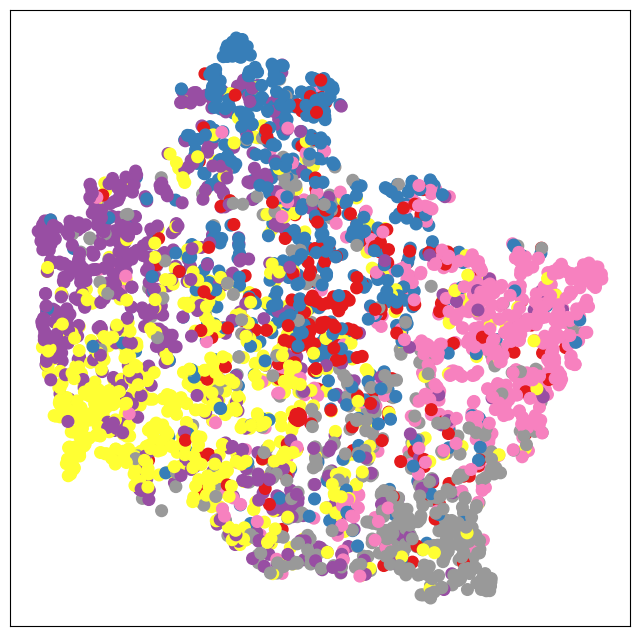

In [21]:
# Set the model to evaluation mode
# This disables dropout and batch normalization (if used), ensuring stable predictions
model.eval()

# Perform a forward pass through the model to generate node embeddings
out = model(citeseer_graph)
# `out` contains the node representations (embeddings) after passing through the trained MLP model.
# The shape of `out` is expected to be [num_nodes, num_classes], where:
# - num_nodes: The total number of nodes in the graph.
# - num_classes: The number of possible categories for classification.

# Print the shape of the node embeddings to verify dimensions
print("Node embedding shape:", out.shape)
# This helps check if the output shape matches the expected number of nodes and classes.

# Visualize the learned node embeddings using t-SNE
visualize(out, color = citeseer_graph.cpu().y)
# - `out`: The computed node embeddings, which will be reduced to 2D using t-SNE.
# - `citeseer_graph.cpu().y`: The ground-truth labels (node classes), used for coloring the nodes.
# - `.cpu()`: Ensures that the tensor is moved to CPU before using it in visualization (necessary for plotting).
